In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

from nltk.corpus import stopwords, words
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
    classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("./datasets/cleaned_reviews.csv")

df.head(10)

,text,label
0,product is good but price is to high after pur...,2
1,not gudpoor cloth,0
2,did not show correct reading even once,0
3,4 star for short power chord thanks flipkart f...,2
4,issue is mop road rotatingits off worst qualit...,0
5,product it is not very good not perfectly join...,1
6,very cheap quality damaged pieces waste of money,0
7,this product its good but so lightweight not o...,0
8,product so very good quality but delivered to ...,1
9,it gave negative result in covid test but when...,0


In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((13896,), (13896,), (3474,), (3474,))

In [10]:
def summarize_classification(y_test, y_pred):

    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    
    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print("Length of testing data: ", len(y_test))
    
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    
    print("precision_score : " , prec)
    print("recall_score : ", recall)

In [11]:
text_clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

text_clf

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [12]:
text_clf.fit(x_train, y_train)

y_pred = text_clf.predict(x_test)

y_pred

array([0, 0, 0, ..., 2, 2, 2])

In [13]:
summarize_classification(y_test, y_pred)

Length of testing data:  3474
accuracy_count :  2416
accuracy_score :  0.6954519286125503
precision_score :  0.6898184101458331
recall_score :  0.6954519286125503


In [14]:
report = classification_report(y_test,y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1168
           1       0.64      0.51      0.57      1184
           2       0.73      0.84      0.79      1122

    accuracy                           0.70      3474
   macro avg       0.69      0.70      0.69      3474
weighted avg       0.69      0.70      0.69      3474



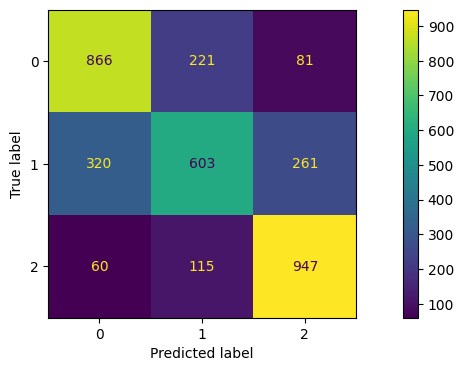

In [15]:
cm = confusion_matrix(y_test,y_pred)

cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize = (12, 4))

cmp.plot(ax = ax)

In [16]:
vectorizer = TfidfVectorizer()

vectorizer

TfidfVectorizer()

In [18]:
text_clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

text_clf

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [19]:
text_clf.fit(x_train, y_train)

y_pred = text_clf.predict(x_test)

y_pred

array([0, 0, 0, ..., 2, 2, 2])

In [20]:
summarize_classification(y_test, y_pred)

Length of testing data:  3474
accuracy_count :  2377
accuracy_score :  0.6842256764536557
precision_score :  0.6799372459944601
recall_score :  0.6842256764536557


In [21]:
report = classification_report(y_test,y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1168
           1       0.65      0.49      0.56      1184
           2       0.72      0.82      0.77      1122

    accuracy                           0.68      3474
   macro avg       0.68      0.69      0.68      3474
weighted avg       0.68      0.68      0.68      3474



##### TFIDF seems to be the best out of all the word embedding and vectorizer so we will keep this

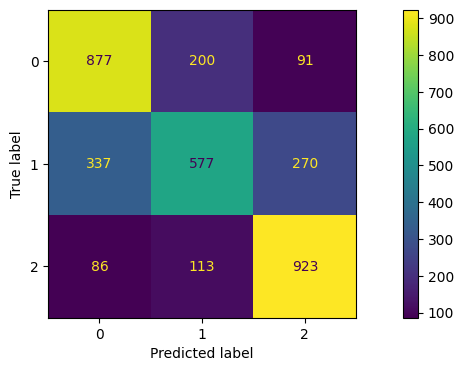

In [22]:
cm = confusion_matrix(y_test,y_pred)

cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize = (12, 4))

cmp.plot(ax = ax)

In [23]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', None)
])

pipeline

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('classifier', None)])

In [24]:
classifiers = [
    MultinomialNB(),
    RandomForestClassifier(),
    SVC(),
    LogisticRegression(max_iter = 1000)
]

classifiers

[MultinomialNB(),
 RandomForestClassifier(),
 SVC(),
 LogisticRegression(max_iter=1000)]

In [25]:
for classifier in classifiers:
    pipeline.set_params(classifier = classifier)

    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)

    accuracy = pipeline.score(x_test, y_test)
    precision = precision_score(y_test, y_pred, average = None)
    recall = recall_score(y_test, y_pred, average = None)
    f1 = f1_score(y_test, y_pred, average = None)

    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")

    for class_label, prec, rec, f1 in zip(["negative", "neutral", "positive"], precision, recall, f1):
        print(f"Class {class_label}:")
        print(f"   F1 Score: {f1:.2f}")
        print(f"   Precision: {prec:.2f}")
        print(f"   Recall: {rec:.2f}")

    report = classification_report(y_test, y_pred)

    print("Classification report-")
    print(report)
    
    print('-'*80)

Classifier: MultinomialNB
Accuracy: 0.68
Class negative:
   F1 Score: 0.71
   Precision: 0.67
   Recall: 0.75
Class neutral:
   F1 Score: 0.56
   Precision: 0.65
   Recall: 0.49
Class positive:
   F1 Score: 0.77
   Precision: 0.72
   Recall: 0.82
Classification report-
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1168
           1       0.65      0.49      0.56      1184
           2       0.72      0.82      0.77      1122

    accuracy                           0.68      3474
   macro avg       0.68      0.69      0.68      3474
weighted avg       0.68      0.68      0.68      3474

--------------------------------------------------------------------------------
Classifier: RandomForestClassifier
Accuracy: 0.74
Class negative:
   F1 Score: 0.75
   Precision: 0.75
   Recall: 0.75
Class neutral:
   F1 Score: 0.65
   Precision: 0.66
   Recall: 0.65
Class positive:
   F1 Score: 0.82
   Precision: 0.82
   Recall: 0.82
Classificati